In [3]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
# get the device for training

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


In [5]:
# define the nn class

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [6]:
# create an instance of model

model = NeuralNetwork().to(device)
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [7]:
X = torch.rand(1, 28, 28).to(device)
logits = model(X)
print(logits)
pred_probab = torch.softmax(logits, dim=1)
print(pred_probab)
y_pred = pred_probab.argmax(1)
print(f'Predicted class: {y_pred}')

tensor([[ 0.1401,  0.0066, -0.0235,  0.0434,  0.0585,  0.0674,  0.0600,  0.0120,
         -0.0213, -0.0087]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.1111, 0.0972, 0.0944, 0.1009, 0.1024, 0.1033, 0.1026, 0.0978, 0.0946,
         0.0958]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([0], device='cuda:0')


In [10]:
# Model layers

input_image = torch.rand(3, 28, 28)
print(input_image.size())

# nn.Flatten layer
# COnvert each 2D 28x28 image to a 1D 784-dimensional vector (minibatch dimension is maintained)

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

# nn.Linear layer
# The linear layer applies a linear transformation on the input using its stored weights and biases

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

# nn.ReLU layer
# Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

# nn.Sequential
# nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined

seq_modules = nn.Sequential(
  flatten,
  layer1,
  nn.ReLU(),
  nn.Linear(20, 10)
)
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)


torch.Size([3, 28, 28])
torch.Size([3, 784])
torch.Size([3, 20])
Before ReLU: tensor([[ 0.6567, -0.4206,  0.1905, -0.0107, -0.5304,  0.5004, -0.0896, -0.1603,
         -0.3829,  0.2445, -0.4847,  0.2647,  0.6392,  0.1039, -0.0335, -0.5326,
          0.3537,  0.3531,  0.3951, -0.1365],
        [ 0.1953, -0.6316, -0.0978,  0.0490, -0.5422, -0.0218,  0.1268,  0.0297,
         -0.4489,  0.1441, -0.6224,  0.3186,  0.7656, -0.0606, -0.2509, -0.0983,
          0.1792,  0.4540,  0.3686,  0.0429],
        [ 0.7368, -0.6552, -0.1588, -0.2888, -0.5384,  0.3615, -0.1741, -0.1942,
         -0.4860,  0.2303, -0.6947,  0.2050,  0.4333, -0.0818, -0.1356, -0.3281,
          0.2951,  0.2010,  0.3450,  0.2181]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.6567, 0.0000, 0.1905, 0.0000, 0.0000, 0.5004, 0.0000, 0.0000, 0.0000,
         0.2445, 0.0000, 0.2647, 0.6392, 0.1039, 0.0000, 0.0000, 0.3537, 0.3531,
         0.3951, 0.0000],
        [0.1953, 0.0000, 0.0000, 0.0490, 0.0000, 0.0000, 0.1268, 0.02

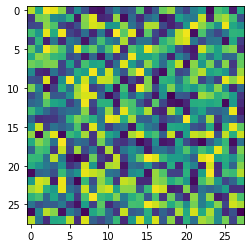

In [12]:
import matplotlib.pyplot as plt

plt.imshow(input_image[0].squeeze())


In [13]:
# nn.Softmax
# The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)


In [14]:
# Model Parameters

print("Module structure:", model, "\n\n")

for name, param in model.named_parameters():
  print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n")

Module structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[-0.0014, -0.0325, -0.0115,  ...,  0.0122, -0.0171,  0.0032],
        [-0.0291, -0.0338, -0.0295,  ...,  0.0165,  0.0063, -0.0151]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([-0.0321, -0.0316], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[ 0.0110, -0.0183, -0.0277,  ..., -0.0436,  0.0222, -0.0304],
        [-0.0092, -0.0376, -0.0334,  ..., -0.0057,  0.0249,  0.0360]],
       device='cuda:0', grad_fn=<Sli